# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 570


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    # city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        #city_weather = weather_response.json()
        city_weather = requests.get(city_url).json()
        
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =  city_weather["clouds"]["all"]
        city_wind = city_weather["main"]["humidity"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | woolgoolga
Processing Record 3 of Set 1 | sinabang
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | vilyuysk
Processing Record 6 of Set 1 | enewetak
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | isoka
Processing Record 9 of Set 1 | pandan
Processing Record 10 of Set 1 | buncrana
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | tabou
Processing Record 16 of Set 1 | port saint john's
Processing Record 17 of Set 1 | iskateley
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | yanam
Processing Record 20 of Set 1 | san antonio de pale
Processing Record 21 of Set 1 | dudinka
Processing Record 22 of Set 1 | jamestown
P

Processing Record 41 of Set 4 | bangor trident base
Processing Record 42 of Set 4 | mar del plata
Processing Record 43 of Set 4 | ulysses
Processing Record 44 of Set 4 | utrik
Processing Record 45 of Set 4 | petropavlovsk-kamchatsky
Processing Record 46 of Set 4 | inongo
Processing Record 47 of Set 4 | lihue
Processing Record 48 of Set 4 | kasongo-lunda
Processing Record 49 of Set 4 | inhambane
Processing Record 0 of Set 5 | huarmey
Processing Record 1 of Set 5 | altay
Processing Record 2 of Set 5 | labasa
Processing Record 3 of Set 5 | nuuk
Processing Record 4 of Set 5 | dakhla
Processing Record 5 of Set 5 | hami
Processing Record 6 of Set 5 | nelson bay
Processing Record 7 of Set 5 | ardestan
Processing Record 8 of Set 5 | thompson
Processing Record 9 of Set 5 | marsh harbour
Processing Record 10 of Set 5 | nova sintra
Processing Record 11 of Set 5 | bakanas
Processing Record 12 of Set 5 | kalmunai
Processing Record 13 of Set 5 | khovd
Processing Record 14 of Set 5 | sao miguel do ar

Processing Record 31 of Set 8 | bac lieu
Processing Record 32 of Set 8 | revda
Processing Record 33 of Set 8 | sao jose da coroa grande
Processing Record 34 of Set 8 | chibougamau
Processing Record 35 of Set 8 | kapuskasing
Processing Record 36 of Set 8 | sogndal
Processing Record 37 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 38 of Set 8 | latnaya
Processing Record 39 of Set 8 | maues
Processing Record 40 of Set 8 | hammerfest
Processing Record 41 of Set 8 | port-vila
Processing Record 42 of Set 8 | flagstaff
Processing Record 43 of Set 8 | alpena
Processing Record 44 of Set 8 | kyabe
Processing Record 45 of Set 8 | flying fish cove
Processing Record 46 of Set 8 | n'dalatando
Processing Record 47 of Set 8 | geraldton
Processing Record 48 of Set 8 | hinton
Processing Record 49 of Set 8 | tobi village
City not found. Skipping...
Processing Record 0 of Set 9 | petrinja
Processing Record 1 of Set 9 | remire-montjoly
Processing Record 2 of Set 9 | balykshi
Processing

In [35]:
print(city_weather)

{'coord': {'lon': -50.6467, 'lat': -23.1811}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.43, 'feels_like': 24.73, 'temp_min': 24.43, 'temp_max': 24.43, 'pressure': 1014, 'humidity': 69, 'sea_level': 1014, 'grnd_level': 940}, 'visibility': 10000, 'wind': {'speed': 1.55, 'deg': 71, 'gust': 3.14}, 'clouds': {'all': 69}, 'dt': 1707864903, 'sys': {'country': 'BR', 'sunrise': 1707815374, 'sunset': 1707861855}, 'timezone': -10800, 'id': 3465508, 'name': 'Cornélio Procópio', 'cod': 200}


In [47]:
# Print city_data list of appended citites
print(city_data)

[{'City': 'port-aux-francais', 'Lat': -49.35, 'Lng': 70.2167, 'Max Temp': 7.88, 'Humidity': 89, 'Cloudiness': 100, 'Wind Speed': 89, 'Country': 'TF', 'Date': 1707864826}, {'City': 'woolgoolga', 'Lat': -30.1106, 'Lng': 153.2007, 'Max Temp': 27.93, 'Humidity': 64, 'Cloudiness': 0, 'Wind Speed': 64, 'Country': 'AU', 'Date': 1707864826}, {'City': 'sinabang', 'Lat': 2.4803, 'Lng': 96.3801, 'Max Temp': 27.27, 'Humidity': 78, 'Cloudiness': 62, 'Wind Speed': 78, 'Country': 'ID', 'Date': 1707864826}, {'City': 'port mathurin', 'Lat': -19.6833, 'Lng': 63.4167, 'Max Temp': 27.42, 'Humidity': 80, 'Cloudiness': 81, 'Wind Speed': 80, 'Country': 'MU', 'Date': 1707864826}, {'City': 'vilyuysk', 'Lat': 63.7553, 'Lng': 121.6247, 'Max Temp': -38.33, 'Humidity': 100, 'Cloudiness': 96, 'Wind Speed': 100, 'Country': 'RU', 'Date': 1707864827}, {'City': 'enewetak', 'Lat': 11.3474, 'Lng': 162.3373, 'Max Temp': 26.15, 'Humidity': 78, 'Cloudiness': 94, 'Wind Speed': 78, 'Country': 'MH', 'Date': 1707864827}, {'City

In [67]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [68]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,7.88,89,100,89,TF,1707864826
1,woolgoolga,-30.1106,153.2007,27.93,64,0,64,AU,1707864826
2,sinabang,2.4803,96.3801,27.27,78,62,78,ID,1707864826
3,port mathurin,-19.6833,63.4167,27.42,80,81,80,MU,1707864826
4,vilyuysk,63.7553,121.6247,-38.33,100,96,100,RU,1707864827


In [69]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [70]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index=True, header=True, index_label="City ID")

In [71]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col = "City ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,7.88,89,100,89,TF,1707864826
1,woolgoolga,-30.1106,153.2007,27.93,64,0,64,AU,1707864826
2,sinabang,2.4803,96.3801,27.27,78,62,78,ID,1707864826
3,port mathurin,-19.6833,63.4167,27.42,80,81,80,MU,1707864826
4,vilyuysk,63.7553,121.6247,-38.33,100,96,100,RU,1707864827


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

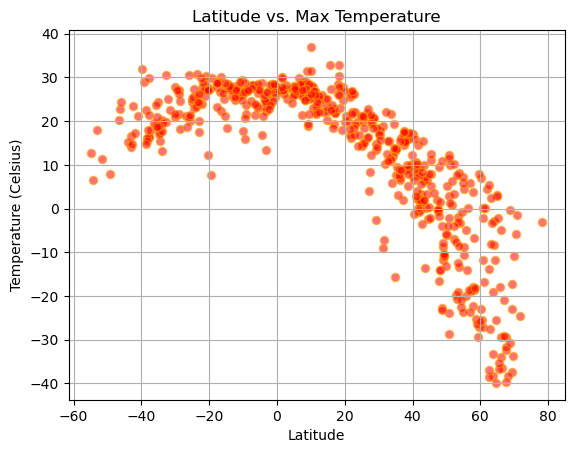

In [86]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = 'o', facecolor = 'red', edgecolor = 'orange', alpha= .75)
# city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(6,6), title="Latitude vs. Max Temperature")

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig01.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

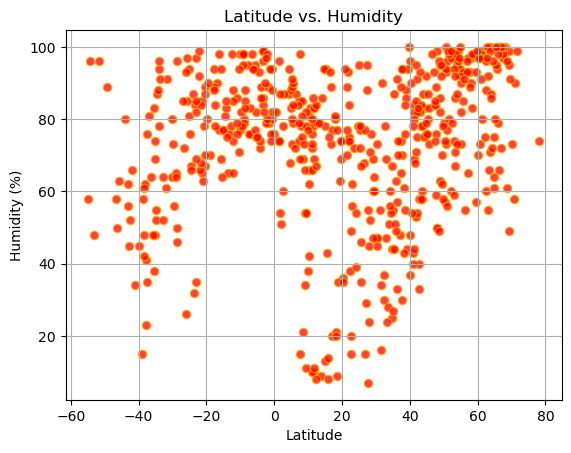

In [87]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = 'o', facecolor = 'red', edgecolor = 'orange', alpha= .75)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig02.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

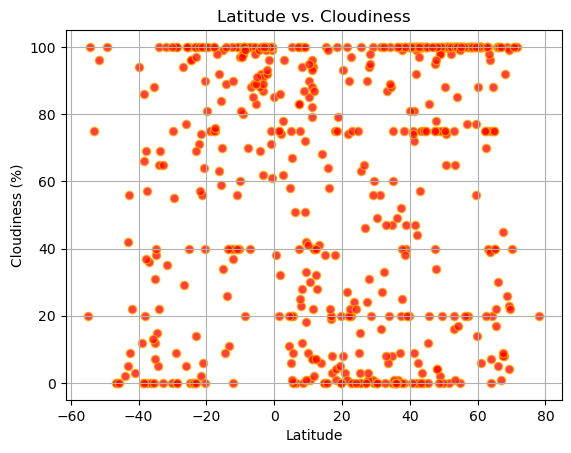

In [88]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = 'o', facecolor = 'red', edgecolor = 'orange', alpha= .75)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig03.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

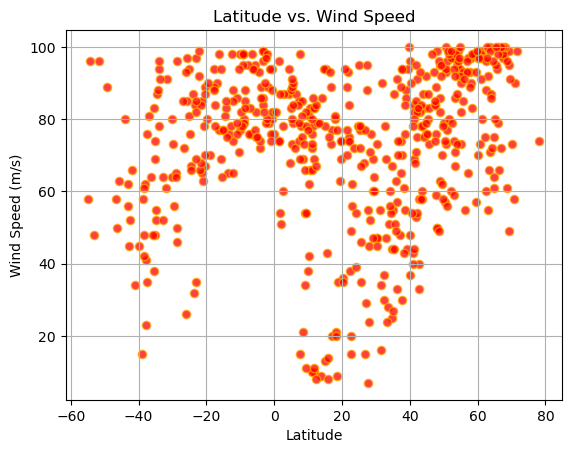

In [214]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", facecolor = "red", edgecolor = "orange", alpha= 0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig04.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [215]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = (x_values * slope) + intercept
    line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, facecolor = 'red', edgecolor = 'orange')
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), max(y_values)), color = "red", fontsize = 10)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [216]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
2,sinabang,2.4803,96.3801,27.27,78,62,78,ID,1707864826
4,vilyuysk,63.7553,121.6247,-38.33,100,96,100,RU,1707864827
5,enewetak,11.3474,162.3373,26.15,78,94,78,MH,1707864827
8,pandan,14.0453,124.1694,25.07,86,68,86,PH,1707864827
9,buncrana,55.1333,-7.4500,4.60,90,100,90,IE,1707864827


In [217]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,7.88,89,100,89,TF,1707864826
1,woolgoolga,-30.1106,153.2007,27.93,64,0,64,AU,1707864826
3,port mathurin,-19.6833,63.4167,27.42,80,81,80,MU,1707864826
6,west island,-12.1568,96.8225,27.99,74,40,74,CC,1707864827
7,isoka,-10.1606,32.6335,17.77,98,97,98,ZM,1707864827


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8657895417739296


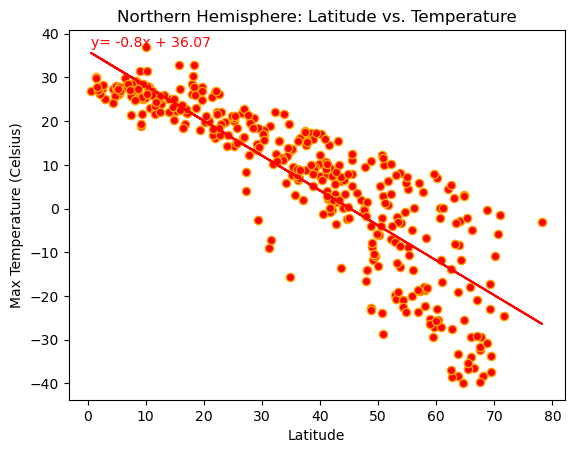

In [218]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.title("Northern Hemisphere: Latitude vs. Temperature")
linear_regression(x_values, y_values)

The r-value is: 0.5134310820241641


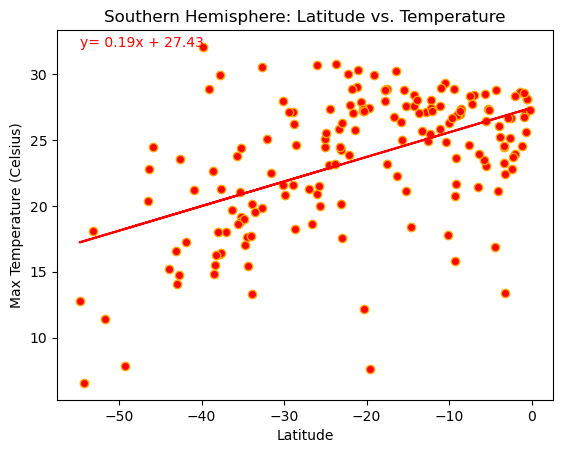

In [219]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.title("Southern Hemisphere: Latitude vs. Temperature")
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** For the Northern Hemisphere, there is a strong (r ≥ 0.7) negative correlation between Latitude and Temperature . As latitude increases, temperature decreases.
For the Southern Hemisphere, with the r-value having just crossed into the moderate strength of correllation (0.5 ≤ r < 0.7) there is a moderate positive correlation between Latitude and Temperature. As latitude increases, temperature increases. This makes sense in that we would expect the temperature to be warmer the closer we move towards the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3428207790211535


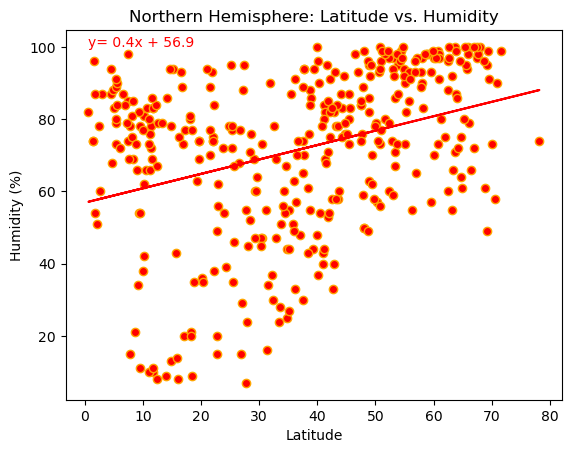

In [220]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: Latitude vs. Humidity")
linear_regression(x_values, y_values)

The r-value is: 0.5105106872683346


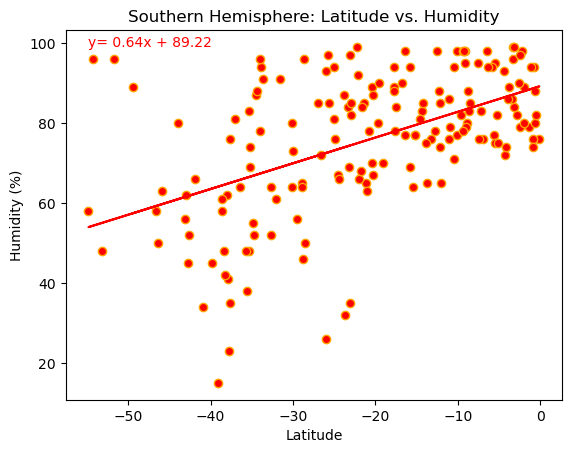

In [221]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: Latitude vs. Humidity")
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** For the Northern Hemisphere, there is a weak (0.3 ≤ r < 0.5) positive correlation between Latitude and Humidity. As latitude increases, humidity increases.
For the Southern Hemisphere, there is moderate (0.5 ≤ r < 0.7) positive correlation between Latitude and Humidity. As latitude increases, humidity increases. This makes sense in that a latitude increase means moving closer towards the equator, where higher temperatures might also come with higher humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.24792006239221961


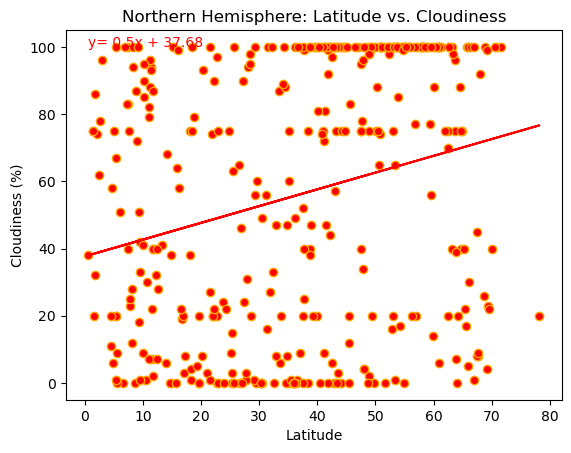

In [222]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: Latitude vs. Cloudiness")
linear_regression(x_values, y_values)

The r-value is: 0.48370155794693404


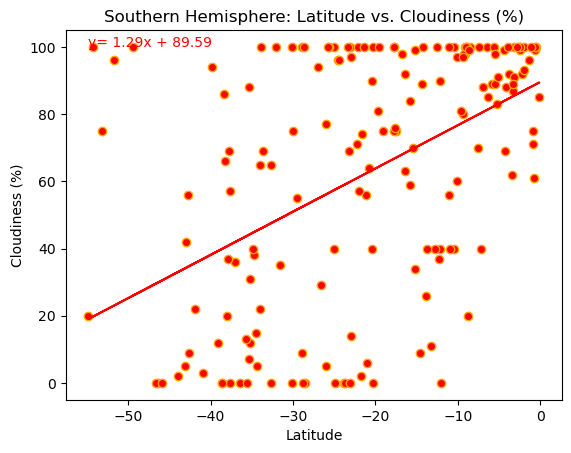

In [226]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: Latitude vs. Cloudiness (%)")
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** For the Northern Hemisphere, there is none or a very weak (r < 0.3) positive correlation between Latitude and Cloudiness. As Latitude increases, Cloudiness increases. For the Southern Hemisphere, there is a weak (0.3 ≤ r < 0.5) positive correlation between Latitude and Cloudiness. The r-values seems to indicate that there is no correlation between Latitude and Cloudiness within both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.3428207790211535


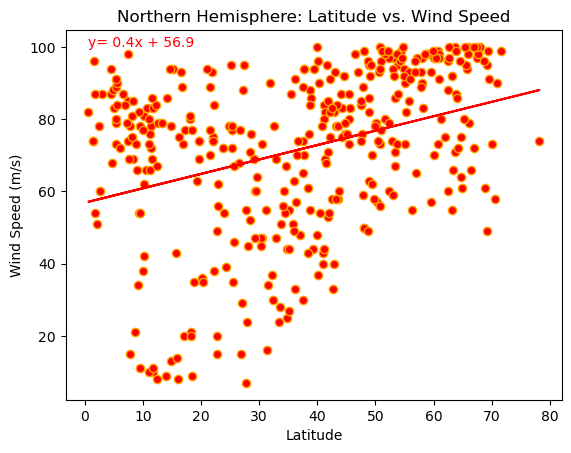

In [224]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere: Latitude vs. Wind Speed")
linear_regression(x_values, y_values)

The r-value is: 0.5105106872683346


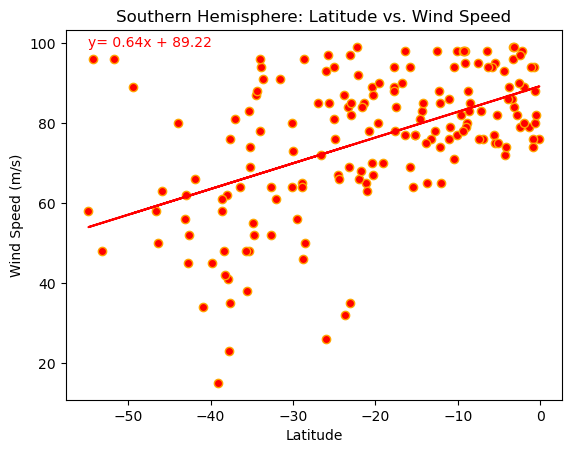

In [225]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** For the Northern Hemisphere, there is a weak (0.3 ≤ r < 0.5) positive correlation between Latitude and Wind Speed. For the Southern Hemisphere, there is a moderate (0.5 ≤ r < 0.7) positive correlation between Latitude and Wind Speed. 